# A First Look at Model Output

This notebook serves as a demo for taking a first look at model output. This example is shown for Mike's Calfornia Current regional model. You can follow and/or adapt this notebook based on your configuration

First, import packages to visualize the model fields here:

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

Next, define the location of the run directory for the model. This directory should live next to the directory where your input directory is located.

In [2]:
# define the run directory
run_dir = 'C:\\Users\\andre\\OneDrive\\Desktop\\Classwork\\cs185c\\project\\run'

## Downloading a file
Your model should be implemented with output for a variety of model fields. In this notebook, let's just download one so we can see how the model is performing. In Mike's model, we output daily snapshots of temperature and salinity at the surface in the California current region. 

On Spartan, these fields live at the following location:

```
/home/mwood/nobackupp/MITgcm/configurations/coastal_california/run/diags/TS_surf_daily_mean
```

I will pick one of these at random and download it into my run directory. First, I will ensure the necessary directories are constructed:

In [3]:
os.makedirs(os.path.join(run_dir,'diags'), exist_ok=True)
os.makedirs(os.path.join(run_dir,'diags','TS_surf_daily_mean'), exist_ok=True)

Next, I will download one of the files at random with the following command:

```
scp mwood@spartan03.sjsu.edu:/home/mwood/nobackupp/MITgcm/configurations/coastal_california/run/diags/TS_surf_daily_mean/TS_surf_daily_mean.0000017280.data .
```

## Making a Plot

With the data in hand, let's go ahead and make a quick plot. First, we will read in the data:

In [6]:
n_rows = 204
n_cols = 300
variables = ['THETA','SALT']
data = np.fromfile(os.path.join(run_dir,'diags','TS_surf_daily_mean','TS_surf_daily_mean.0000090720.data'),'>f4')
data = np.reshape(data,(len(variables),n_rows,n_cols))

Next, let's make a plot:

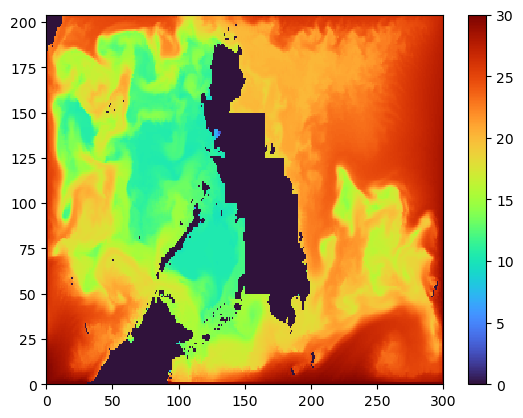

In [8]:
plt.figure()
C = plt.pcolormesh(data[0,:,:],cmap='turbo', vmin=0, vmax=30)
plt.colorbar(C)
plt.show()